<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML321ENSkillsNetwork817-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Calculate Course Similarity using BoW Features**


Estimated time needed: **45** minutes


Similarity measurement between items is the foundation of many recommendation algorithms, especially for content-based recommendation algorithms. For example, if a new course is similar to user's enrolled courses, we could recommend that new similar course to the user. Or If user A is similar to user B, then we can recommend some of user B's courses to user A (the unseen courses) because user A and user B may have similar interests.


In a previous course, you learned many similarity measurements such as `consine`, `jaccard index`, or `euclidean distance`, and these methods need to work on either two vectors or two sets (sometimes even matrices or tensors). 

In previous labs, we extracted the BoW features from course textual content. Given the course BoW feature vectors, we can easily apply similarity measurement to calculate the course similarity as shown in the below figure.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/module_2/images/course_sim.png)


## Objectives


After completing this lab you will be able to:


* Calculate the similarity between any two courses using BoW feature vectors


----


## Prepare and setup lab environment


First let's install and import required libraries:


In [30]:
!pip install nltk==3.6.7
!pip install gensim==4.1.2

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gensim
import pandas as pd
import nltk as nltk

from scipy.spatial.distance import cosine
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams
from gensim import corpora

%matplotlib inline

In [32]:
# also set a random state
rs = 123

### Calculate the consine similarity between two example courses


Suppose we have two simple example courses:


In [33]:
course1 = "machine learning for everyone"

In [34]:
course2 = "machine learning for beginners"

Next we can quickly tokenize them using the split() method (or using `word_tokenize()` method provided in `nltk` as we did in the previous lab).


In [35]:
tokens = set(course1.split() + course2.split())

In [36]:
tokens = list(tokens)
tokens

['everyone', 'for', 'learning', 'beginners', 'machine']

then generate BoW features (token counts) for these two courses (or using `tokens_dict.doc2bow()` method provided in `nltk`, similar to what we did in the previous lab).


In [37]:
def generate_sparse_bow(course):
    bow_vector = []
    words = course.split()
    for token in tokens:
        if token in words:
            bow_vector.append(1)
        else:
            bow_vector.append(0)
    return bow_vector

In [38]:
bow1 = generate_sparse_bow(course1)
bow1

[1, 1, 1, 0, 1]

In [39]:
bow2 = generate_sparse_bow(course2)
bow2

[0, 1, 1, 1, 1]

From the above cell outputs, we can see the two vectors are very similar. Only two dimensions are different.


Now we can quickly apply the cosine similarity measurement on the two vectors:


In [40]:
cos_sim = 1 - cosine(bow1, bow2)

In [41]:
print(f"The cosine similarity between course `{course1}` and course `{course2}` is {round(cos_sim, 2) * 100}%")

The cosine similarity between course `machine learning for everyone` and course `machine learning for beginners` is 75.0%


_Practice: Try other similarity measurements such as Euclidean Distance or Jaccard index._


In [42]:
# WRITE YOUR CODE HERE
from scipy.spatial.distance import euclidean, jaccard


print(f"The euclidean distance between course `{course1}` and course `{course2}` is {euclidean(bow1,bow2) } , the jaccard index is {jaccard(bow1,bow2) }")

The euclidean distance between course `machine learning for everyone` and course `machine learning for beginners` is 1.4142135623730951 , the jaccard index is 0.4


For Example: Euclidean distance between 2 points $p$ and $q$ can be summarized by this equation: $d(p,q)={\sqrt {(p_{1}-q_{1})^{2}+(p_{2}-q_{2})^{2}+(p_{3}-q_{3})^{2}}}$. You can use `euclidean(p,q)` function from ```scipy``` package to calculate it. 


### TASK: Find similar courses to the course `Machine Learning with Python`


Now you have learned how to calculate cosine similarity between two sample BoW feature vectors. Let's work on some real course BoW feature vectors.


In [43]:
# Load the BoW features as Pandas dataframe
bows_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/courses_bows.csv"
bows_df = pd.read_csv(bows_url)
bows_df = bows_df[['doc_id', 'token', 'bow']]

In [44]:
bows_df.head(10)

,doc_id,token,bow
0,ML0201EN,ai,2
1,ML0201EN,apps,2
2,ML0201EN,build,2
3,ML0201EN,cloud,1
4,ML0201EN,coming,1
5,ML0201EN,create,1
6,ML0201EN,data,1
7,ML0201EN,developer,1
8,ML0201EN,found,1
9,ML0201EN,fun,1


The `bows_df` dataframe contains the BoW features vectors for each course, in a vertical and dense format. It has three columns `doc_id` represents the course id, `token` represents the token value, and `bow` represents the BoW value (token count).


Then, let's load another course content dataset which contains the course title and description:


In [45]:
# Load the course dataframe
course_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_processed.csv"
course_df = pd.read_csv(course_url)

In [46]:
course_df.head(10)

,COURSE_ID,TITLE,DESCRIPTION
0,ML0201EN,robots are coming build iot apps with watson ...,have fun with iot and learn along the way if ...
1,ML0122EN,accelerating deep learning with gpu,training complex deep learning models with lar...
2,GPXX0ZG0EN,consuming restful services using the reactive ...,learn how to use a reactive jax rs client to a...
3,RP0105EN,analyzing big data in r using apache spark,apache spark is a popular cluster computing fr...
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,learn how to containerize package and run a ...
5,CNSC02EN,cloud native security conference data security,introduction to data security on cloud
6,DX0106EN,data science bootcamp with r for university pr...,a multi day intensive in person data science ...
7,GPXX0FTCEN,learn how to use docker containers for iterati...,learn how to use docker containers for iterati...
8,RAVSCTEST1,scorm test 1,scron test course
9,GPXX06RFEN,create your first mongodb database,in this guided project you will get started w...


Given course ID `ML0101ENv3`, let's find out its title and description:


In [47]:
course_df[course_df['COURSE_ID'] == 'ML0101ENv3']

,COURSE_ID,TITLE,DESCRIPTION
158,ML0101ENv3,machine learning with python,machine learning can be an incredibly benefici...


We can see it is a machine learning with Python course so we can expect any machine learning or Python related courses would be similar.


Then, let's print its associated BoW features:


In [48]:
ml_course = bows_df[bows_df['doc_id'] == 'ML0101ENv3']
ml_course

,doc_id,token,bow
2747,ML0101ENv3,course,1
2748,ML0101ENv3,learning,4
2749,ML0101ENv3,machine,3
2750,ML0101ENv3,need,1
2751,ML0101ENv3,get,1
2752,ML0101ENv3,started,1
2753,ML0101ENv3,python,2
2754,ML0101ENv3,tool,1
2755,ML0101ENv3,tools,1
2756,ML0101ENv3,predict,1


We can see the BoW feature vector is in vertical format but normally feature vectors are in horizontal format. One way to transpose the feature vector from vertical to horizontal is to use the Pandas `pivot()` method:


In [49]:
ml_courseT = ml_course.pivot(index=['doc_id'], columns='token').reset_index(level=[0])
ml_courseT

doc_id        bow                                              \
token             beneficial course free future get give hidden insights   
0      ML0101ENv3          1      1    1      1   1    1      1        1   

                                                                          \
token learning machine need predict python started supervised tool tools   
0            4       3    1       1      2       1          1    1     1   

                           
token trends unsupervised  
0          1            1

To compare the BoWs of any two courses, which normally have a different set of tokens, we need to create a union token set and then transpose them. We have provided a method called `pivot_two_bows` as follows:


In [50]:
def pivot_two_bows(basedoc, comparedoc):
    base = basedoc.copy()
    base['type'] = 'base'
    compare = comparedoc.copy()
    compare['type'] = 'compare'
    # Append the two token sets vertically
    join = base.append(compare)
    # Pivot the two joined courses
    joinT = join.pivot(index=['doc_id', 'type'], columns='token').fillna(0).reset_index(level=[0, 1])
    # Assign columns
    joinT.columns = ['doc_id', 'type'] + [t[1] for t in joinT.columns][2:]
    return joinT

In [51]:
course1 = bows_df[bows_df['doc_id'] == 'ML0151EN']
course2 = bows_df[bows_df['doc_id'] == 'ML0101ENv3']

In [52]:
bow_vectors = pivot_two_bows(course1, course2)
bow_vectors

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)


,doc_id,type,approachable,basics,beneficial,comparison,course,dives,free,future,...,relates,started,statistical,supervised,tool,tools,trends,unsupervised,using,vs
0,ML0101ENv3,compare,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,ML0151EN,base,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


Similarly, we can use the cosine method to calculate their similarity:


In [53]:
similarity = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])
similarity

0.6626221399549089

Now it's your turn to perform a task of finding all courses similar to the course `Machine Learning with Python`:


In [54]:
course_df[course_df['COURSE_ID'] == 'ML0101ENv3']

,COURSE_ID,TITLE,DESCRIPTION
158,ML0101ENv3,machine learning with python,machine learning can be an incredibly benefici...


You can set a similarity threshold such as 0.5 to determine if two courses are similar enough.


_TODO: Find courses which are similar to course `Machine Learning with Python (ML0101ENv3)`, you also need to show the title and descriptions of those courses._


In [57]:
# WRITE YOUR CODE HERE
similarity_cutoff=0.5
coursesSimilar = []
## For each course other than ML0101ENv3, use pivot_course_rows to convert it with course ML0101ENv3 into horizontal two BoW feature vectors
## Then use the cosine method to calculate the similarity
## Report all courses with similarities larger than a specific threshold (such as 0.5)
for i in range(len(course_df)):
    course1 = bows_df[bows_df['doc_id'] == 'ML0151EN']
    course2 = bows_df[bows_df['doc_id'] == course_df.iloc[i, 0]]
    bow_vectors = pivot_two_bows(course1, course2)
    similarity = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])
    if similarity > similarity_cutoff:
        coursesSimilar.append(course_df["COURSE_ID"][i])


/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

In [58]:
print(coursesSimilar)

['ML0109EN', 'ML0101ENv3', 'ML0151EN', 'excourse46', 'excourse47', 'excourse51', 'excourse60', 'excourse69']


In [59]:
#Modified code to get the count of recommended courses per each cutoff
import pandas as pd

# Define the range of similarity cutoffs
similarity_cutoffs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # Adjust as needed

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['similarity_cutoff', 'count_courses'])

# Iterate over the similarity cutoffs
for similarity_cutoff in similarity_cutoffs:
    coursesSimilar = []
    
    # For each course, calculate the similarity with ML0101ENv3
    for i in range(len(course_df)):
        course1 = bows_df[bows_df['doc_id'] == 'ML0151EN']
        course2 = bows_df[bows_df['doc_id'] == course_df.iloc[i, 0]]
        bow_vectors = pivot_two_bows(course1, course2)
        similarity = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])
        if similarity > similarity_cutoff:
            coursesSimilar.append(course_df["COURSE_ID"][i])
    
    # Calculate the count of recommended courses
    count_courses = len(coursesSimilar)
    
    # Add the results to the dataframe
    results_df = results_df.append({'similarity_cutoff': similarity_cutoff, 'count_courses': count_courses}, ignore_index=True)

# Print the results dataframe
print(results_df)


/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

   similarity_cutoff  count_courses
0                0.1           75.0
1                0.2           45.0
2                0.3           30.0
3                0.4           16.0
4                0.5            8.0
5                0.6            4.0
6                0.7            1.0
7                0.8            1.0
8                0.9            1.0
9                1.0            0.0


/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append(compare)
/tmp/ipykernel_254453/2063086322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join = base.append

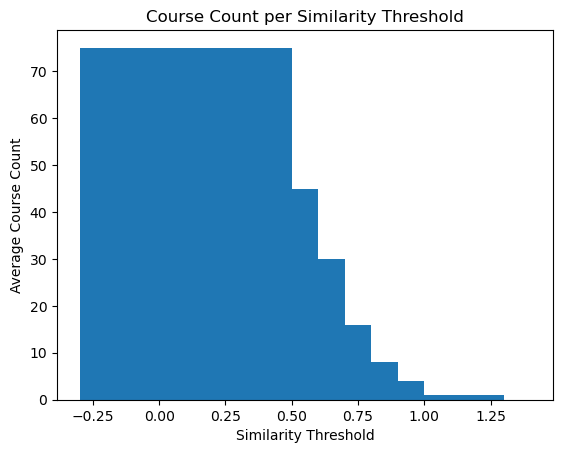

In [61]:
plt.bar(results_df['similarity_cutoff'], results_df['count_courses'])
plt.xlabel('Similarity Threshold')
plt.ylabel('Average Course Count')
plt.title('Course Count per Similarity Threshold')
plt.show()

In [63]:
results_df

,similarity_cutoff,count_courses
0,0.1,75.0
1,0.2,45.0
2,0.3,30.0
3,0.4,16.0
4,0.5,8.0
5,0.6,4.0
6,0.7,1.0
7,0.8,1.0
8,0.9,1.0
9,1.0,0.0


In [68]:
coursesSimilar = ['ML0109EN', 'ML0101ENv3', 'ML0151EN', 'excourse46', 'excourse47', 'excourse51', 'excourse60', 'excourse69']


# Filter the course_df dataframe
filtered_course_df = course_df[course_df['COURSE_ID'].isin(coursesSimilar)]


filtered_course_df


,COURSE_ID,TITLE,DESCRIPTION
157,ML0109EN,machine learning dimensionality reduction,machine learning dimensionality reduction
158,ML0101ENv3,machine learning with python,machine learning can be an incredibly benefici...
200,ML0151EN,machine learning with r,this machine learning with r course dives into...
259,excourse46,machine learning,machine learning is the science of getting com...
260,excourse47,machine learning for all,machine learning often called artificial inte...
264,excourse51,introduction to machine learning in production,in the first course of machine learning engine...
273,excourse60,introduction to tensorflow for artificial inte...,if you are a software developer who wants to b...
282,excourse69,machine learning with big data,want to make sense of the volumes of data you ...


<details>
    <summary>Click here for Hints</summary>
    
You can use `bows_df[bows_df['doc_id'] == 'ML0101ENv3']` to find 'ML0101ENv3' course bow. Then in a similar matter you can find bows for each course_id that's not 'ML0101ENv3'. Then you can join 2 bows by using predefined `pivot_two_bows` function and calculate the similarity as we just did using the cosine method. Print the course ids with similarity>0.5 
</details>


### Summary


Congratulations, you have finished the course similarity lab. In this lab, you used cosine and course BoW features to calculate the similarities among courses. Such similarity measurement is the core of many content-based recommender systems, which you will learn and practice in the later labs.


## Authors


[Yan Luo](https://www.linkedin.com/in/yan-luo-96288783/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML321ENSkillsNetwork817-2022-01-01)


### Other Contributors


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2021-10-25|1.0|Yan|Created the initial version|


Copyright © 2021 IBM Corporation. All rights reserved.
